# Benchmark results

This section investigates how scalable is our software. We report median run time, memory usage, and iteration number for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and a single core 3.3GHz processor. 

In [1]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using StatsPlots
using Measures

In [2]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"
dir_negativebinomial = "negativebinomial_results"
dir_negativebinomial_nodebias = "negativebinomial_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson; dir_negativebinomial; dir_negativebinomial_nodebias]

8-element Array{String,1}:
 "normal_results_nodebias"          
 "normal_results"                   
 "logistic_results_nodebias"        
 "logistic_results"                 
 "poisson_results_nodebias"         
 "poisson_results"                  
 "negativebinomial_results"         
 "negativebinomial_results_nodebias"

## First read the benchmark results in, and print out failed results

In [3]:
all_benchmark_results = Vector{Matrix}(undef, 8)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir  = dir * "/" * string(10000i) * "_by_1000000_run$j"
            
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            else
                println(string(10000i) * " run $j for " * dir * " does not exist")
            end
        end
        
        cur_response[i, 1] = median(a_particular_run[:, 1])
        cur_response[i, 2] = median(a_particular_run[:, 2])
        cur_response[i, 3] = median(a_particular_run[:, 3])
    end
    all_benchmark_results[k] = cur_response
end

120000 run 2 for poisson_results does not exist
120000 run 4 for poisson_results does not exist
70000 run 3 for negativebinomial_results does not exist
110000 run 5 for negativebinomial_results does not exist
40000 run 3 for negativebinomial_results_nodebias does not exist
80000 run 5 for negativebinomial_results_nodebias does not exist
120000 run 4 for negativebinomial_results_nodebias does not exist


In [4]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]
negativebinomial_results_nodebias = all_benchmark_results[7]
negativebinomial_results = all_benchmark_results[8]

12×3 Array{Float64,2}:
  54.6381  0.173064  15.0
 109.675   0.161043  13.0
 162.339   0.182344  15.0
 217.218   0.178333  14.0
 271.424   0.182813  14.0
 324.11    0.196264  15.0
 371.606   0.255689  21.0
 423.421   0.27058   22.0
 485.845   0.210184  15.0
 542.523   0.205213  14.0
 589.141   0.239006  17.0
 647.59    0.224104  15.0

In [5]:
poisson_results

12×3 Array{Float64,2}:
  53.0594  0.413274   28.0
 101.981   2.85977   100.0
 155.489   1.1208     46.0
 208.841   0.759682   33.0
 260.933   0.831362   33.0
 312.97    0.986479   35.0
 365.421   1.25439    34.0
 418.443   0.885944   30.0
 469.795   1.09135    32.0
 521.42    1.18976    33.0
 556.524   4.77751   100.0
 625.895   1.30015    32.0

In [6]:
poisson_results_nodebias

12×3 Array{Float64,2}:
  52.5245  0.797359  42.0
 103.443   0.951948  64.0
 155.242   0.485372  50.0
 207.912   0.391404  39.0
 259.306   0.434327  43.0
 310.444   0.478049  46.0
 360.748   0.614761  60.0
 411.227   0.663685  65.0
 466.136   0.476337  43.0
 518.589   0.447095  40.0
 567.719   0.542872  49.0
 619.046   0.561122  49.0

# Plot time/memory/iter, separating debias and no-debias

In [7]:
storage = 1000 .* model_sizes .* 10^7 * .2 .* 1.25e-10

no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] negativebinomial_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1] negativebinomial_results[:, 1]]
no_debias_memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] negativebinomial_results_nodebias[:, 2] storage]
yes_debias_memory = [normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2] negativebinomial_results[:, 2] storage]
no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] negativebinomial_results_nodebias[:, 3]]
yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3] negativebinomial_results[:, 3]]

12×4 Array{Float64,2}:
 3.0  4.0   28.0  15.0
 2.0  6.0  100.0  13.0
 2.0  7.0   46.0  15.0
 2.0  2.0   33.0  14.0
 2.0  2.0   33.0  14.0
 2.0  2.0   35.0  15.0
 2.0  5.0   34.0  21.0
 2.0  3.0   30.0  22.0
 2.0  2.0   32.0  15.0
 2.0  2.0   33.0  14.0
 2.0  3.0  100.0  17.0
 2.0  2.0   32.0  15.0

## Begin plotting

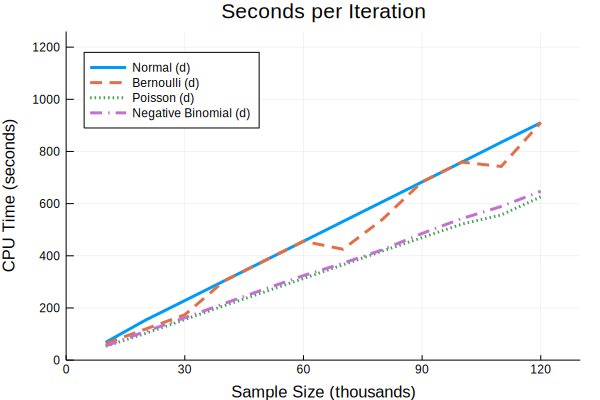

In [8]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Binomial (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

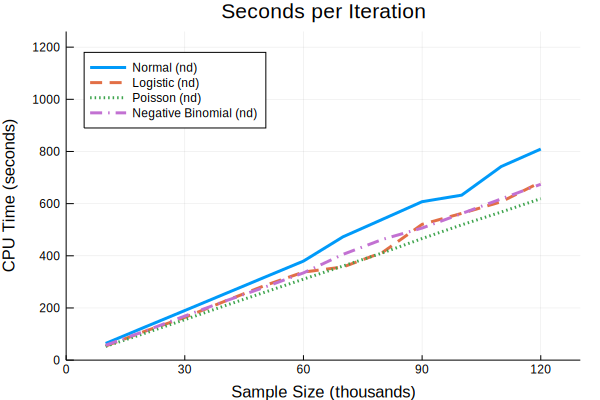

In [9]:
no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (nd)" "Logistic (nd)" "Poisson (nd)" "Negative Binomial (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

In [12]:
#(d) = yes debias, (nd) = no-debias

yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

yes_debias_iter_plot = plot(model_sizes, yes_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 120),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations")

no_debias_iter_plot = plot(model_sizes, no_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"],
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 120),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations");

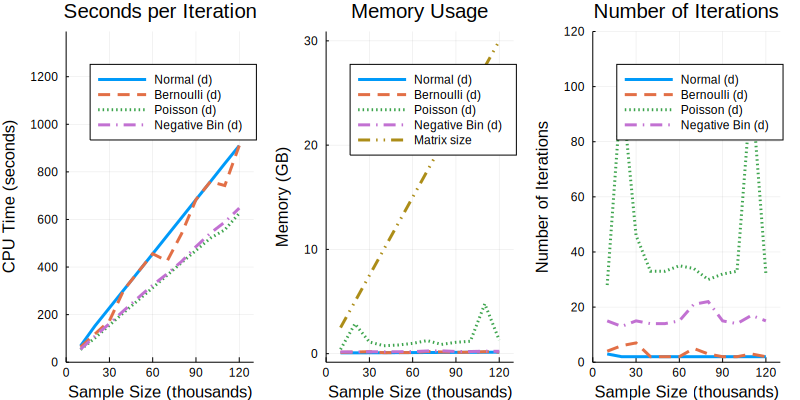

In [13]:
yes_debias_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot]
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400))

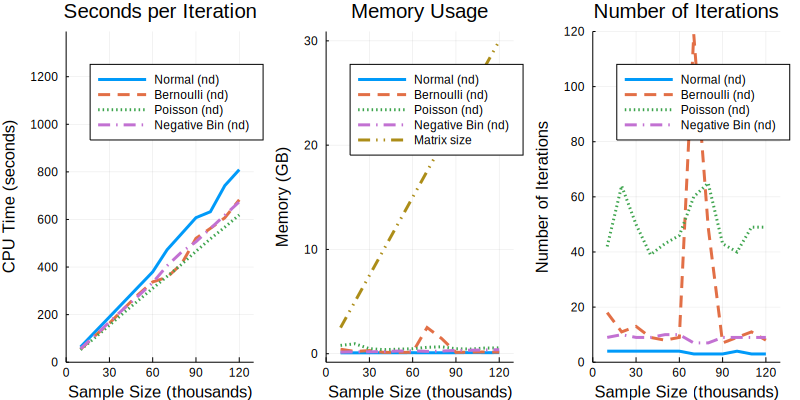

In [14]:
no_debias_plots = [no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400))

# Save previous 2 plots in high resolution

In [15]:
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
savefig(yes_debias, "yes_debias")
savefig(no_debias, "no_debias")

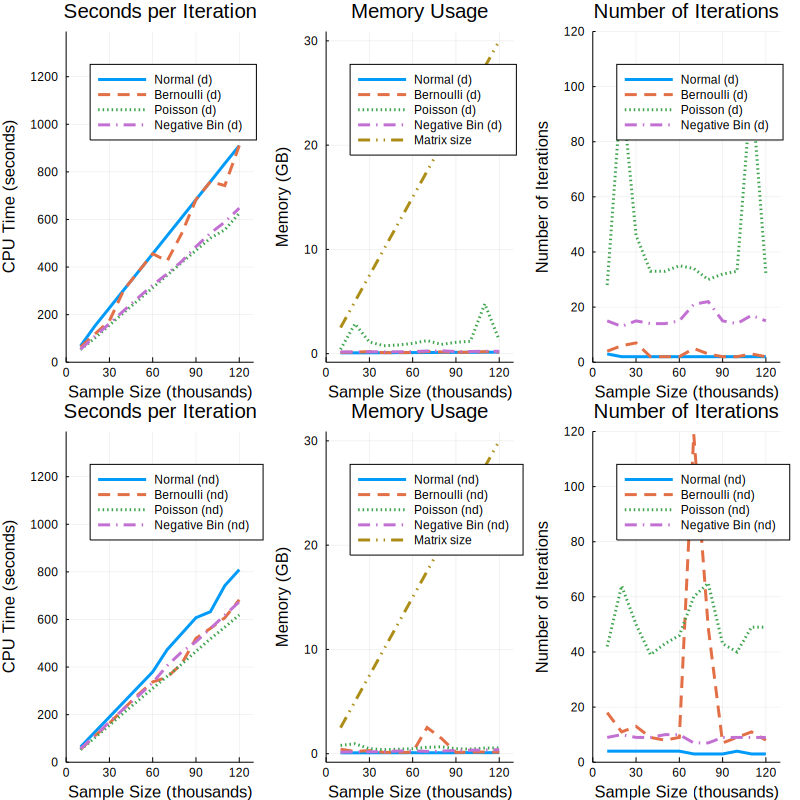

In [16]:
all_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
plt = plot(all_plots..., layout = (2,3), size = (800, 800))